In [2]:
# The function to save the table as html and convert to picture

from html2image import Html2Image

def save_table_as_pic(df, name):
    dict_data = [df.to_dict(), df.to_dict('index')]
    htmldf = '<!DOCTYPE HTML><html><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"></head><body>'

    htmldf = htmldf + '<table  width="auto" ><tr>'

    for key in dict_data[0].keys():
        htmldf = htmldf + '<th class="header" height="30px" style="font-weight: bold; background-color: #C0C9CC; padding: 15px;">' + key + '</th>'

    htmldf = htmldf + '</tr>'

    for key in dict_data[1].keys():
        htmldf = htmldf + '<tr height="30px"'
        htmldf = htmldf + 'style="padding: 5px;" >' if key % 2 == 0 else htmldf + 'style="background-color: #F2F1F0; padding: 5px;">'
        for subkey in dict_data[1][key]:
            htmldf = htmldf + '<td style="padding: 5px;">' + str(dict_data[1][key][subkey]) + '</td>'
        htmldf = htmldf + '</tr>'
    htmldf = htmldf + '</tr>'
    htmldf = htmldf + '</tr></table></body></html>'

    with open(name+'.html','wb') as f:
        f.write(htmldf.encode("utf-8"))

# Base data analysis

In [3]:
%matplotlib inline
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import random
import calendar
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('seaborn-dark-palette')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

C:\Users\rengu\AppData\Local\Temp\ipykernel_17580\3777933785.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [5]:
df = pd.read_csv("../data/water/braganca/changed_type_and_zone_to_str.csv")
df.head(5)

,Year,Month,Consumer_number,Consumption,Installation_number,Date,Consumer_type,Installation_zone
0,2013,1,21018,0,0,2013-01-01,DOMÉSTICO,Samil
1,2013,1,23874,7,0,2013-01-01,DOMÉSTICO,Samil
2,2013,1,21039,5,0,2013-01-01,DOMÉSTICO,Samil
3,2013,1,21056,0,0,2013-01-01,DOMÉSTICO,Samil
4,2013,1,43945,10,0,2013-01-01,DOMÉSTICO,Samil


In [18]:
# save_table_as_pic(df_2019.head(), 'final_df_sample')

# Consumer types description

In [28]:
cons_tipo_description = pd.DataFrame({'Consumer_type' : [], 'Count':[], 'Max_consumption' : [], 
                                      'Min_consumption' : [], 'Avg_consumption' : [], 'Std_consumption' : []})
columns = list(cons_tipo_description)
data = []

In [29]:
df['Consumer_type'].unique()

array(['DOMÉSTICO', ' COM/INDUSTRIAL/OBRAS', 'OBRAS', 'UTIL.PUBLICA',
       'ESTADO', 'DOM./RURAL A.S', 'FAM.CARENCIADAS', 'CP.DOM/URB',
       'FAM.NUMEROSAS', 'REGA', 'CMB', 'COM./RURAL A.S', 'EXP.A.RURAL',
       'RURAL DOMÉSTICO', 'RURAL/ESTADO', 'IGREJAS', 'IPSS/IGR/RURAL',
       'CP.COM/RURAL', 'CP.DOM/RURAL'], dtype=object)

In [34]:
for i in df['Consumer_type'].unique():
    consumer_i = df[df['Consumer_type'] == i]
    N = len(consumer_i)
    Max = consumer_i['Consumption'].max()
    Min = consumer_i['Consumption'].min()
    Avg = consumer_i['Consumption'].mean()
    Std = consumer_i['Consumption'].std()
    values = [i, N, Max, Min, Avg, Std]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
    
data = pd.DataFrame.from_dict(data)
cons_tipo_description  = pd.concat([cons_tipo_description, data])
cons_tipo_description = cons_tipo_description.sort_values('Consumer_type')

In [35]:
cons_tipo_description = cons_tipo_description.sort_values('Count', ascending=False)
cons_tipo_description

,Consumer_type,Count,Max_consumption,Min_consumption,Avg_consumption,Std_consumption
0,DOMÉSTICO,244607.0,2119.0,0.0,6.795963,8.747158
13,RURAL DOMÉSTICO,66913.0,920.0,0.0,4.911661,8.216990
1,COM/INDUSTRIAL/OBRAS,23889.0,4978.0,0.0,11.066181,61.204172
5,DOM./RURAL A.S,6996.0,1037.0,0.0,5.983705,14.476464
2,OBRAS,2887.0,635.0,0.0,7.483201,22.125758
6,FAM.CARENCIADAS,1456.0,113.0,0.0,8.810440,8.085101
12,EXP.A.RURAL,1329.0,100.0,0.0,3.428894,7.718286
4,ESTADO,1208.0,2710.0,0.0,110.406457,294.363092
7,CP.DOM/URB,1177.0,97.0,0.0,5.186066,7.693659
3,UTIL.PUBLICA,885.0,4408.0,0.0,171.325424,466.592767


In [43]:
cons_tipos = pd.read_csv('../data/water/consumer_types_processed.csv', low_memory=False)
cons_tipos

,Consumer_type,Name
0,1,DOMESTICO
1,2,INDUSTRIAL
2,3,UTIL.PUBLICA
3,4,OBRAS
4,5,ESTADO
5,6,IGREJAS
6,7,RURAL
7,21,REGA
8,22,CMB


In [72]:
# Types code changing

df['Consumer_type'].loc[(df['Consumer_type'] == 14)]= 1
# 9, 10, 16, 17, 18, 19, 20  = 7
# 11, 12, 13, 14 = 1
# 15 = 2


In [74]:
df['Consumer_type'].nunique()

9

In [47]:
df.head()

,Year,Month,Consumer_number,Consumer_type,Installation_zone,Consumption,Installation_number
0,2013,1,21018,1,4,0,0
1,2013,1,36690,2,6,5,0
2,2013,1,17940,1,6,6,0
3,2013,1,14273,1,6,1,0
4,2013,1,5,1,6,13,0


In [77]:
df_1 = pd.merge(df, cons_tipos,  left_on='Consumer_type', right_on='Consumer_type', how='inner')
df_1 = df_1.drop(columns=['Consumer_type']).rename(columns={'Name':'Consumer_type'})
df_1.head()

,Year,Month,Consumer_number,Installation_zone,Consumption,Installation_number,Consumer_type
0,2013,1,21018,4,0,0,DOMESTICO
1,2013,1,17940,6,6,0,DOMESTICO
2,2013,1,14273,6,1,0,DOMESTICO
3,2013,1,5,6,13,0,DOMESTICO
4,2013,1,11,6,31,0,DOMESTICO


In [79]:
df_1.to_csv('../data/water/main_with_merged_cons_type.csv', index=False)

In [18]:
cons_tipo_description = pd.merge(cons_tipo_description, cons_tipos,  left_on='Consumer_type', right_on='Consumer_type', how='inner')
cons_tipo_description

,Consumer_type,Count,Max_consumption,Min_consumption,Avg_consumption,Std_consumption,Name
0,1,247313.0,2119.0,0.0,6.732545,8.720043,DOMESTICO
1,7,76405.0,100.0,0.0,6.937884,1.119556,RURAL
2,2,23889.0,4978.0,0.0,11.066181,61.204172,INDUSTRIAL
3,4,2887.0,635.0,0.0,7.483201,22.125758,OBRAS
4,5,1208.0,2710.0,0.0,110.406457,294.363092,ESTADO
5,3,885.0,4408.0,0.0,171.325424,466.592767,UTIL.PUBLICA
6,22,170.0,2115.0,0.0,87.858824,239.445101,CMB
7,21,140.0,3298.0,0.0,275.257143,618.510620,REGA
8,6,47.0,29.0,0.0,4.085106,7.371596,IGREJAS


In [19]:
df['Consumer_type'].nunique()

9

In [13]:
df.head(5)

,Year,Month,Consumer_number,Consumption,Installation_number,Date,Consumer_type,Installation_zone
0,2013,1,21018,0,0,2013-01-01,DOMÉSTICO,Samil
1,2013,1,23874,7,0,2013-01-01,DOMÉSTICO,Samil
2,2013,1,21039,5,0,2013-01-01,DOMÉSTICO,Samil
3,2013,1,21056,0,0,2013-01-01,DOMÉSTICO,Samil
4,2013,1,43945,10,0,2013-01-01,DOMÉSTICO,Samil


# Description by zonas values

In [14]:
zona = df.drop(columns=["Consumer_number", 'Consumer_type', "Installation_number", 'Month', 'Year', 'Date'])
zona = zona.groupby(['Installation_zone'], as_index=False).sum()
zona = zona.sort_values('Consumption', ascending=False)
zona = zona.reset_index().drop(columns=['index'])
zona.head()

,Installation_zone,Consumption
0,"Se, Santa Maria e Meixedo",1128719
1,Samil,638030
2,Gimonde,570209
3,"Izeda, Calvelhe e Paradinha Nove",56474
4,Coelhoso,19860


In [54]:
zonas1 = zona.iloc[:25,:].reset_index().drop(columns=['index'])
zonas2 = zona.iloc[25:,:].reset_index().rename(columns={'Name':'Name ', 'Consumption':'Consumption '}).drop(columns=['index'])

concatenated = pd.concat([zonas1, zonas2], axis="columns")
concatenated = concatenated.replace(np.nan, 0, regex=True)
concatenated = concatenated.astype({'Consumption ':'int'})
concatenated = concatenated.replace(0, '', regex=True)
concatenated

,Name,Consumption,Name,Consumption
0,Samil,1276060,,
1,Gimonde,1140418,,
2,Coelhoso,19860,,
3,Nogueira,14403,,
4,Outeiro,10914,,
5,Quintanilha,10682,,
6,Santa Comba de Rossas,10630,,
7,Espinhosela,10349,,
8,Salsas,8779,,
9,Sortes,8230,,


In [28]:
save_table_as_pic(concatenated, 'zone_consumption')

C:\Users\rengu\AppData\Local\Temp/ipykernel_18456/2412247488.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_data = [df.to_dict(), df.to_dict('index')]


In [29]:
zonas =  df.drop(columns=['Year', 'Month', 'Consumer_number', 'Consumer_type', 'Installation_number'])
zonas.describe()

,Installation_zone,Consumption
count,352944.00,352944.00
mean,11.27,7.72
std,16.79,40.22
min,1.00,0.00
25%,3.00,1.00
50%,4.00,5.00
75%,6.00,9.00
max,66.00,4978.00


# Consumption description by zone

In [30]:
zonas_description = pd.DataFrame({'Zone' : [], 'Count':[], 'Max_consumption' : [], 
                                      'Min_consumption' : [], 'Avg_consumption' : [], 'Std_consumption' : []})
columns = list(zonas_description)
data = []
zonas_description

for i in zona['Installation_zone'].unique():
    if i == 0:
        continue
    zone_i = df[df['Installation_zone'] == i]
    zone_name = zona_names[zona_names['Zona'] == i].Nome.item()
    N = len(zone_i)
    Max = zone_i['Consumption'].max()
    Min = zone_i['Consumption'].min()
    Avg = zone_i['Consumption'].mean()
    Std = zone_i['Consumption'].std()
    values = [zone_name, N, Max, Min, Avg, Std]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    data.append(a_dictionary)
zonas_description = zonas_description.append(data, True)
zonas_description = zonas_description.sort_values('Count', ascending=False)
zonas_description = zonas_description.query('Zone == "Samil" or Zone == "Gimonde" or Zone == "Santa-Maria" or Zone == "Sé" or Zone == "Izeda" or Zone == "Pombares"')
zonas_description 

,Zone,Count,Max_consumption,Min_consumption,Avg_consumption,Std_consumption
0,Samil,81821.00,3437.00,0.00,7.80,29.16
1,Santa-Maria,74048.00,2710.00,0.00,8.58,45.54
2,Gimonde,70733.00,4978.00,0.00,8.06,32.97
3,Sé,53918.00,4408.00,0.00,9.10,63.69
4,Izeda,4681.00,3611.00,0.00,10.07,96.56
48,Pombares,255.00,22.00,0.00,3.75,3.76


In [31]:
len(zonas_description)

6

In [32]:
save_table_as_pic(zonas_description, 'zonas_description')

# Total consumption yearly

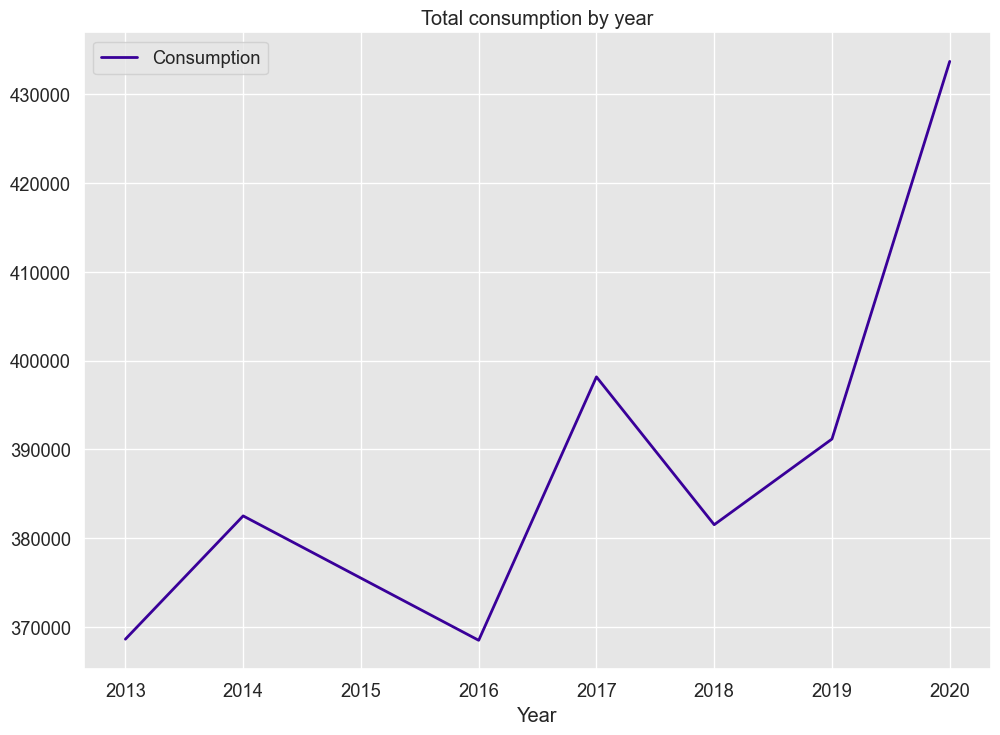

In [16]:
yearly = df.drop(columns=['Month', 'Consumer_number', 'Installation_zone', 'Installation_number', 'Date', 'Consumer_type'])
yearly_2 = yearly.groupby(['Year'], as_index=False).sum()
yearly_2
# yearly['Consumption'] = (yearly['Consumption'] -yearly['Consumption'].min())/(yearly['Consumption'].max() - yearly['Consumption'].min())
yearly_2.plot.line(x='Year', y='Consumption', title="Total consumption by year", color='#390099')
# plt.savefig('charts/base_analysis/total_consumption.png')
plt.show(block=True)

# Total consumption by years, consumer type and installation zone

In [80]:
df_1.head()

,Year,Month,Consumer_number,Installation_zone,Consumption,Installation_number,Consumer_type
0,2013,1,21018,4,0,0,DOMESTICO
1,2013,1,17940,6,6,0,DOMESTICO
2,2013,1,14273,6,1,0,DOMESTICO
3,2013,1,5,6,13,0,DOMESTICO
4,2013,1,11,6,31,0,DOMESTICO


In [81]:
df_1['Year'].unique()

array([2013, 2014, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [82]:
df_1 = df_1.drop(columns=['Month', 'Consumer_number', 'Installation_zone', 'Installation_number'])
# df1 = pd.merge(df, cons_tipos,  left_on='Consumer_type', right_on='Consumer_type', how='inner').drop(columns=['Consumer_type']).rename(columns={'Name': 'Consumer_type'})
df_1 = df_1.groupby(['Year', 'Consumer_type'], as_index=False).aggregate({'Consumption':'sum'})
# df1['Consumption'] = (df1['Consumption']-df1['Consumption'].min())/(df1['Consumption'].max()-df1['Consumption'].min())
df_1.head(5)

,Year,Consumer_type,Consumption
0,2013,INDUSTRIAL,40018
1,2013,DOMESTICO,229619
2,2013,ESTADO,12038
3,2013,IGREJAS,0
4,2013,OBRAS,2543


In [83]:
df_1['Consumption'].isna().values.any()
df_1.unstack(level=0, fill_value=0)
df_1 = df_1.pivot(index='Year', columns='Consumer_type', values='Consumption')
df_1 = df_1.fillna(0)

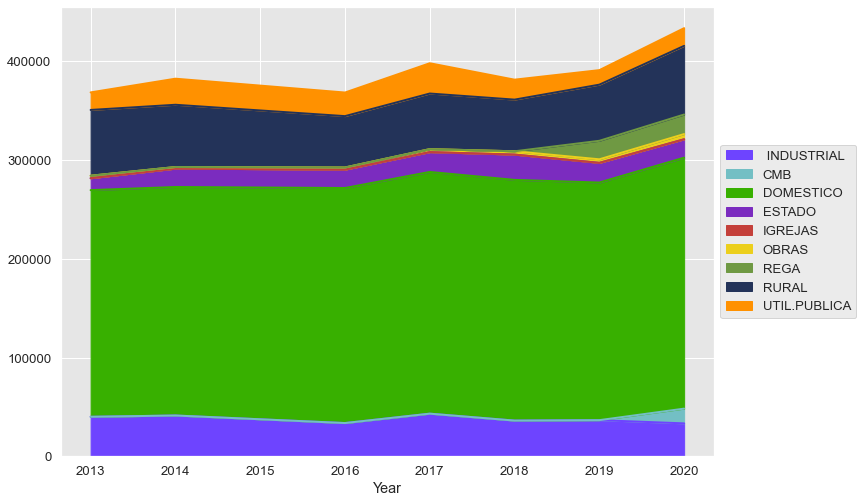

In [108]:
colors = [ '#6e44ff', '#73bfc4', '#38b000','#7b2cbf', '#c4403a', '#eccf1c',
           '#6f9943', '#233359', '#ff9100',  
            ]
df_1.plot.area(color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("../charts/base_analysis/yearly_cons_by_consumer_type.png", bbox_inches='tight')
plt.show()

In [110]:
41862 + 22189 + 16909 + 4557 + 2573 + 66

88156

In [175]:
df2['Installation_zone'].isna().values.any()
df2.unstack(level=0, fill_value=0)
df2 = df2.pivot(index='Year', columns='Installation_zone', values='Consumption')
df2 = df2.fillna(0)

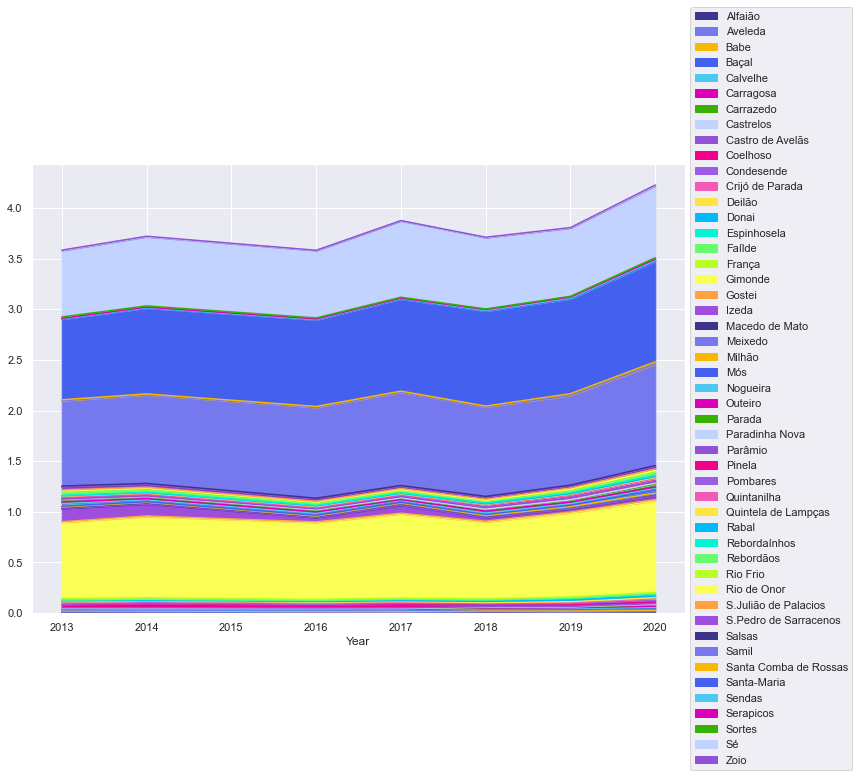

In [176]:
colors = ['#3d348b', '#7678ed', '#f7b801', '#4361ee', '#4cc9f0',
          '#db00b6', '#38b000', '#c1d3fe', '#9053D7', '#f20089',
          '#9b5de5', '#f15bb5', '#fee440', '#00bbf9', '#00f5d4',   
          '#66FC6E', '#BAFF24', '#F9FF55', '#FFA23F', '#9d4edd',]
df2.plot.area(color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("charts/base_analysis/yearly_cons_by_zone.png", bbox_inches='tight')
plt.show()

# Domestic and Industrial types monthly analysis

In [42]:
domestico = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number"])
domestico = domestico[domestico['Consumer_type'] == 1].drop(columns=['Consumer_type'])
domestico_sum = domestico.groupby(['Year', 'Month'], as_index=False).sum()
domestico_sum["Date"] = domestico_sum["Year"].astype(str) + "-" + domestico_sum["Month"].astype(str)
domestico_sum["Date"] = pd.to_datetime(domestico_sum["Date"]).dt.strftime('%b-%Y')
domestico_sum['Consumption'] = ((domestico_sum['Consumption'])/(domestico_sum['Consumption'].max()))*10
domestico_sum = domestico_sum.drop(columns = ['Year', 'Month'])
domestico_sum.head()

,Consumption,Date
0,9.47,Jan-2013
1,7.49,Feb-2013
2,7.47,Mar-2013
3,7.78,Apr-2013
4,8.60,May-2013


In [43]:
industrial = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number"])
industrial = industrial[industrial['Consumer_type'] == 2].drop(columns=['Consumer_type'])
industrial_sum = industrial.groupby(['Year', 'Month'], as_index=False).sum()
industrial_sum["Date"] = industrial_sum["Year"].astype(str) + "/" + industrial_sum["Month"].astype(str)
industrial_sum["Date"] = pd.to_datetime(industrial_sum["Date"], format='%Y/%m/%d').dt.strftime('%b-%Y')
industrial_sum['Consumption'] = ((industrial_sum['Consumption'])/(industrial_sum['Consumption'].max()))*10
industrial_sum = industrial_sum.drop(columns = ['Year', 'Month'])
industrial_sum.head()

,Consumption,Date
0,4.68,Jan-2013
1,5.74,Feb-2013
2,4.05,Mar-2013
3,4.16,Apr-2013
4,4.81,May-2013


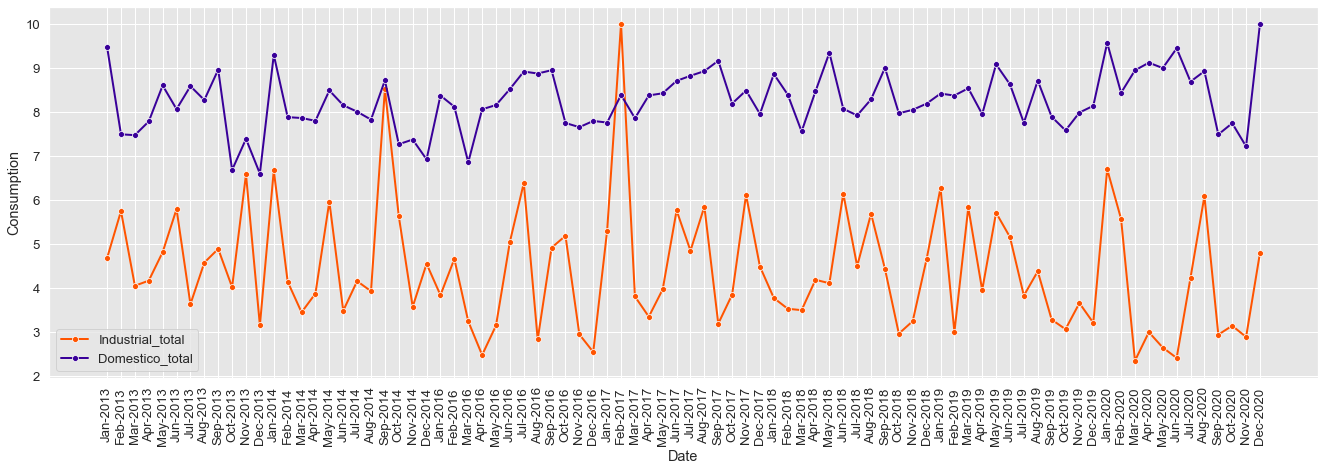

In [44]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)


firstPlot = sns.lineplot(x=industrial_sum.Date, y=industrial_sum.Consumption, label="Industrial_total", marker = 'o', color='#ff5400')
sns.lineplot(x=domestico_sum.Date, y=domestico_sum.Consumption, ax=firstPlot,  label="Domestico_total", marker = 'o', color='#390099')

plt.savefig('charts/base_analysis/industrial_domestico_total_monthly.png')
plt.show(block=True)

# Commemoration analysis

In [45]:
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020]

In [46]:
carnaval_2013_start = pd.to_datetime("2013-01-31").strftime('%b-%Y')
carnaval_2013_end = pd.to_datetime("2013-02-13").strftime('%b-%Y') 

carnaval_2014_start = pd.to_datetime("2014-2-28").strftime('%b-%Y')
carnaval_2014_end = pd.to_datetime("2014-3-4").strftime('%b-%Y') 

carnaval_2016_start = pd.to_datetime("2016-1-31").strftime('%b-%Y')
carnaval_2016_end = pd.to_datetime("2016-2-9").strftime('%b-%Y') 

carnaval_2017_start = pd.to_datetime("2017-1-31").strftime('%b-%Y')
carnaval_2017_end = pd.to_datetime("2017-2-28").strftime('%b-%Y') 

carnaval_2018_start = pd.to_datetime("2018-1-31").strftime('%b-%Y')
carnaval_2018_end = pd.to_datetime("2018-2-13").strftime('%b-%Y') 

carnaval_2019_start = pd.to_datetime("2019-2-28").strftime('%b-%Y')
carnaval_2019_end = pd.to_datetime("2019-3-5").strftime('%b-%Y') 

carnaval_2020_start = pd.to_datetime("2020-2-28").strftime('%b-%Y')
carnaval_2020_end = pd.to_datetime("2020-3-5").strftime('%b-%Y') 

In [47]:
pascoa_2013_start = pd.to_datetime("2013-02-28").strftime('%b-%Y')
pascoa_2013_end = pd.to_datetime("2013-03-31").strftime('%b-%Y') 

pascoa_2014_start = pd.to_datetime("2014-3-28").strftime('%b-%Y')
pascoa_2014_end = pd.to_datetime("2014-4-20").strftime('%b-%Y') 

pascoa_2016_start = pd.to_datetime("2016-2-28").strftime('%b-%Y')
pascoa_2016_end = pd.to_datetime("2016-3-27").strftime('%b-%Y') 

pascoa_2017_start = pd.to_datetime("2017-3-30").strftime('%b-%Y')
pascoa_2017_end = pd.to_datetime("2017-4-16").strftime('%b-%Y') 

pascoa_2018_start = pd.to_datetime("2018-3-30").strftime('%b-%Y')
pascoa_2018_end = pd.to_datetime("2018-4-1").strftime('%b-%Y') 

pascoa_2019_start = pd.to_datetime("2019-3-30").strftime('%b-%Y')
pascoa_2019_end = pd.to_datetime("2019-4-21").strftime('%b-%Y') 

pascoa_2020_start = pd.to_datetime("2020-3-30").strftime('%b-%Y')
pascoa_2020_end = pd.to_datetime("2020-4-12").strftime('%b-%Y') 

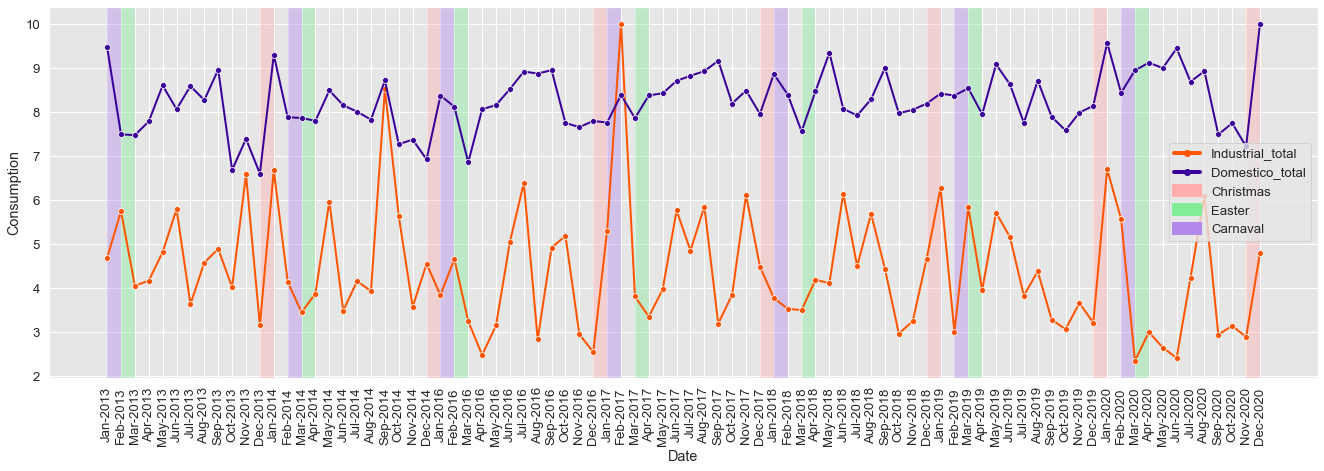

In [50]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)


firstPlot = sns.lineplot(x=industrial_sum.Date, y=industrial_sum.Consumption, label="Industrial_total", marker = 'o', color='#ff5400')
sns.lineplot(x=domestico_sum.Date, y=domestico_sum.Consumption, ax=firstPlot,  label="Domestico_total", marker = 'o', color='#390099')


for i in years:
    if i == 2014: 
        christmas_start = pd.to_datetime(str(i) + "-12-22").strftime('%b-%Y')  
        christmas_end = pd.to_datetime(str(i+2) + "-1-3").strftime('%b-%Y') 
    elif i == 2020:
        christmas_start = pd.to_datetime("2020-11-30").strftime('%b-%Y')  
        christmas_end = pd.to_datetime("2020-12-31").strftime('%b-%Y') 
    else:
        christmas_start = pd.to_datetime(str(i) + "-12-22").strftime('%b-%Y') 
        christmas_end = pd.to_datetime(str(i+1) + "-1-3").strftime('%b-%Y') 
    plt.axvspan(christmas_start, christmas_end, fill=True, linewidth=0, color='#ffadad', alpha=.4)
    

plt.axvspan(carnaval_2013_start, carnaval_2013_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
plt.axvspan(carnaval_2014_start, carnaval_2014_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
plt.axvspan(carnaval_2016_start, carnaval_2016_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
plt.axvspan(carnaval_2017_start, carnaval_2017_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
plt.axvspan(carnaval_2018_start, carnaval_2018_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
plt.axvspan(carnaval_2019_start, carnaval_2019_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
plt.axvspan(carnaval_2020_start, carnaval_2020_end, fill=True, linewidth=0, color='#b388eb', alpha=.4)
# plt.axvspan(carnaval_2013_start, carnaval_2013_end, fill=True, linewidth=0, color='#b388eb')

plt.axvspan(pascoa_2013_start, pascoa_2013_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)
plt.axvspan(pascoa_2014_start, pascoa_2014_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)
plt.axvspan(pascoa_2016_start, pascoa_2016_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)
plt.axvspan(pascoa_2017_start, pascoa_2017_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)
plt.axvspan(pascoa_2018_start, pascoa_2018_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)
plt.axvspan(pascoa_2019_start, pascoa_2019_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)
plt.axvspan(pascoa_2020_start, pascoa_2020_end, fill=True, linewidth=0, color='#80ed99', alpha=.4)



legend_elements = [Line2D([0], [0], color='#ff5400', lw=4, label='Industrial_total', marker='o'),
Line2D([0], [0], color='#390099', lw=4, label='Domestico_total', marker='o'), 
plt.Circle((0, 0), 0.2, color='#ffadad', lw=4, label='Christmas'),
plt.Circle((0, 0), 0.2, color='#80ed99', lw=4, label='Easter'),   
plt.Circle((0, 0), 0.2, color='#b388eb', lw=4, label='Carnaval')]

ax1.legend(handles=legend_elements)
plt.savefig('charts/base_analysis/holidays_consumption.png')
plt.show(block=True)

# Precipitation analysis

In [51]:
prcp = pd.read_excel("data/precipitation.xlsx")
prcp = prcp.rename(columns={'ANO':'Year', 'MÊS':'Month'})
prcp = prcp[(prcp['Year'] != 2015) & (prcp['Year'] != 2010) & (prcp['Year'] != 2011) & (prcp['Year'] != 2012)]
prcp_norm = prcp.copy()
prcp_norm['QPRtot (mm)'] = ((prcp['QPRtot (mm)'])/(prcp['QPRtot (mm)'].max()))*10
prcp = prcp_norm.copy()
prcp["Date"] = prcp["Year"].astype(str) + "/" + prcp["Month"].astype(str)
prcp["Date"] = pd.to_datetime(prcp["Date"], format='%Y/%m/%d').dt.strftime('%b-%Y')
prcp = prcp.drop(columns = ['Year', 'Month'])
prcp.head()

,QPRtot (mm),Date
36,5.50,Jan-2013
37,2.67,Feb-2013
38,7.02,Mar-2013
39,2.06,Apr-2013
40,0.91,May-2013


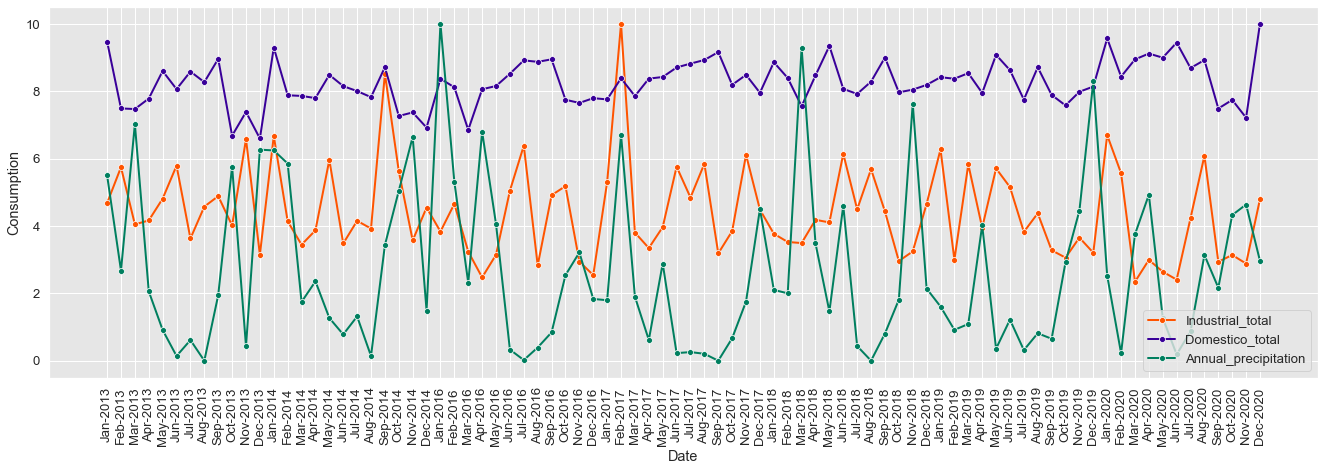

In [52]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
firstPlot = sns.lineplot(x= industrial_sum.Date, y=industrial_sum.Consumption, label="Industrial_total", marker = 'o', color='#ff5400')
sns.lineplot(x=domestico_sum.Date, y=domestico_sum.Consumption, ax=firstPlot,  label="Domestico_total", marker = 'o', color='#390099')
sns.lineplot(x=prcp.Date, y=prcp['QPRtot (mm)'], ax=firstPlot, label='Annual_precipitation', marker = 'o', color='#007f5f')
plt.savefig('charts/base_analysis/precipitation_consumption_total.png')
plt.show(block=True)


# Population analysis

In [57]:
population = pd.read_excel("data/braganca_population_growth.xlsx")
population.head()

,Years,Net increase,Natural increase,Net migration
0,2013,-302,-203,-99
1,2014,-340,-226,-114
2,2016,-267,-199,-68
3,2017,-98,-184,86
4,2018,-82,-228,146


In [66]:
yearly = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number", 'Month'])
yearly = yearly.groupby(['Year'], as_index=False).sum()
yearly['Consumption'] = (yearly['Consumption']-yearly['Consumption'].min())/(yearly['Consumption'].max() - yearly['Consumption'].min())
yearly.head()

,Year,Consumer_type,Consumption
0,2013,156029,0.00
1,2014,153695,0.21
2,2016,147258,0.00
3,2017,146957,0.46
4,2018,156094,0.20


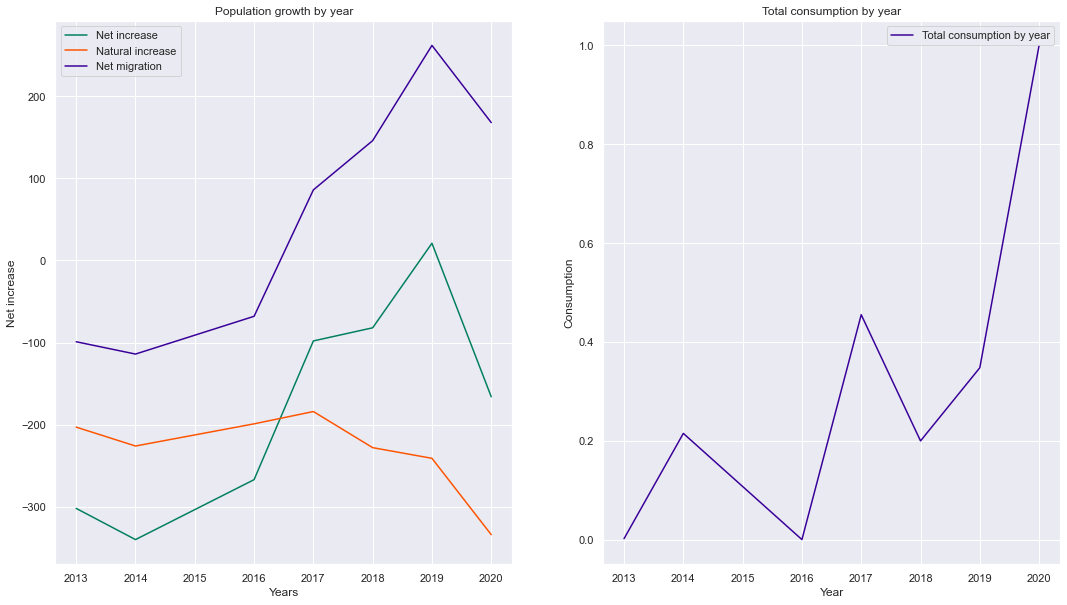

In [59]:
sns.set(rc={'figure.figsize':(18, 10)})
fig, axs = plt.subplots(ncols=2, nrows=1)
firstPlot = sns.lineplot(x=population.Years, y=population['Net increase'], ax=axs[0], label='Net increase', color='#007f5f').set_title("Population growth by year")
sns.lineplot(x=population.Years, y=population['Natural increase'], ax=axs[0], label='Natural increase', color='#ff5400')
sns.lineplot(x=population.Years, y=population['Net migration'], ax=axs[0], label='Net migration', color='#390099')
sns.lineplot(x=yearly.Year, y=yearly.Consumption, ax=axs[1], label="Total consumption by year", color='#390099').set_title("Total consumption by year")
plt.savefig('charts/base_analysis/population_and_consumption.png')
plt.show(block=True)

# Covid-19 cases analysis

In [158]:
data = [[1, pd.to_datetime("1/31", format='%m/%d').strftime('%d-%b')], 
        [2, pd.to_datetime("2/28", format='%m/%d').strftime('%d-%b')], 
        [3, pd.to_datetime("3/31", format='%m/%d').strftime('%d-%b')], 
        [4, pd.to_datetime("4/30", format='%m/%d').strftime('%d-%b')], 
        [5, pd.to_datetime("5/31", format='%m/%d').strftime('%d-%b')], 
        [6, pd.to_datetime("6/30", format='%m/%d').strftime('%d-%b')], 
        [7, pd.to_datetime("7/31", format='%m/%d').strftime('%d-%b')], 
        [8, pd.to_datetime("8/31", format='%m/%d').strftime('%d-%b')], 
        [9, pd.to_datetime("9/30", format='%m/%d').strftime('%d-%b')], 
        [10, pd.to_datetime("10/31", format='%m/%d').strftime('%d-%b')],
        [11, pd.to_datetime("11/30", format='%m/%d').strftime('%d-%b')], 
        [12, pd.to_datetime("12/31", format='%m/%d').strftime('%d-%b')]]
date = pd.DataFrame(data, columns = ['Month', 'Date'])
date

,Month,Date
0,1,31-Jan
1,2,28-Feb
2,3,31-Mar
3,4,30-Apr
4,5,31-May
5,6,30-Jun
6,7,31-Jul
7,8,31-Aug
8,9,30-Sep
9,10,31-Oct


In [175]:
covid = pd.read_csv('data/braganca_covid_general.csv')
covid = covid.groupby(['Month', 'Year'], as_index=False).sum()
covid["Date"] = covid["Year"].astype(str) + "/" + covid["Month"].astype(str) 
covid["Date"] = pd.to_datetime(covid["Date"], format='%Y/%m/%d').dt.strftime('%b-%Y')
covid['Cases'] = covid['Cases']
covid

,Month,Year,Cases,Date
0,1,2020,416,Jan-2020
1,2,2020,423,Feb-2020
2,3,2020,804,Mar-2020
3,4,2020,2146,Apr-2020
4,5,2020,3055,May-2020
5,6,2020,2777,Jun-2020
6,7,2020,1106,Jul-2020
7,8,2020,887,Aug-2020
8,9,2020,1008,Sep-2020
9,10,2020,1658,Oct-2020


In [177]:
df_2020 = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number"])
df_2020 = df_2020[df_2020['Consumer_type'] == 1]
df_2020 = df_2020[df_2020['Year'] == 2020].drop(columns=['Consumer_type']).groupby(['Month', 'Year'], as_index = False).sum()
# df_2020['Consumption'] = ((df_2020['Consumption'].max() - df_2020['Consumption'])/(df_2020['Consumption'].max()))*1000
df_2020["Date"] = df_2020["Year"].astype(str) + "/" + df_2020["Month"].astype(str) 
df_2020["Date"] = pd.to_datetime(df_2020["Date"], format='%Y/%m/%d').dt.strftime('%b-%Y')
# df_2020 = df_2020.merge(date, on=['Month'])
df_2020

,Month,Year,Consumption,Date
0,1,2020,22927,Jan-2020
1,2,2020,20211,Feb-2020
2,3,2020,21436,Mar-2020
3,4,2020,21851,Apr-2020
4,5,2020,21559,May-2020
5,6,2020,22631,Jun-2020
6,7,2020,20821,Jul-2020
7,8,2020,21389,Aug-2020
8,9,2020,17941,Sep-2020
9,10,2020,18554,Oct-2020


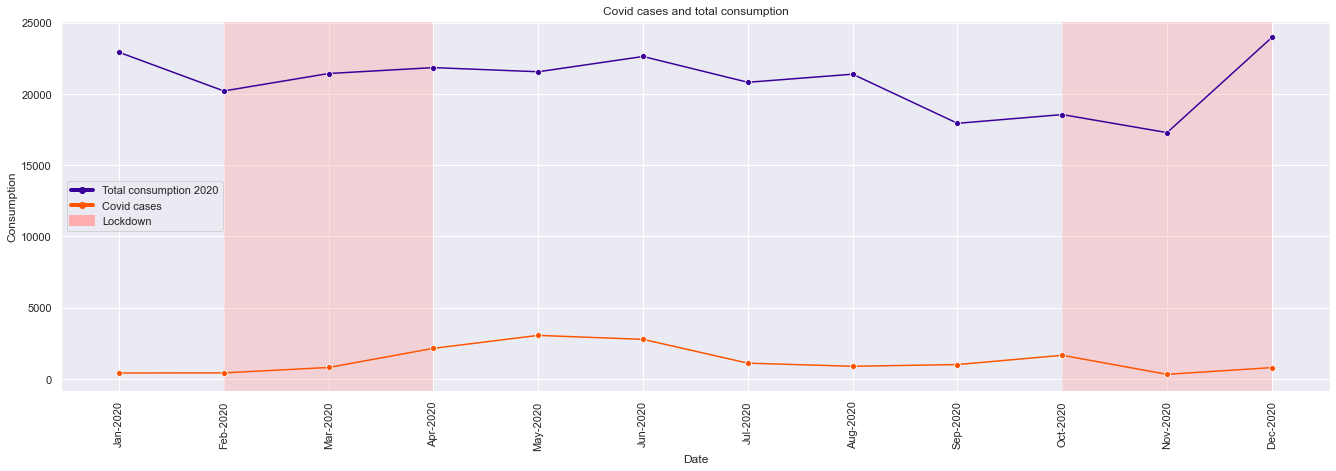

In [178]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
firstPlot = sns.lineplot(x=df_2020.Date, y=df_2020.Consumption, ax=ax1, marker = 'o', color='#390099').set_title("Covid cases and total consumption")
sns.lineplot(x=covid.Date, y=covid.Cases, ax=ax1,  label="Covid cases", marker = 'o', color='#ff5400')
plt.axvspan(pd.to_datetime("2020/02", format='%Y/%m').strftime('%b-%Y'),  pd.to_datetime("2020/4", format='%Y/%m').strftime('%b-%Y'), fill=True, linewidth=0, color='#ffadad', alpha=.4)
plt.axvspan(pd.to_datetime("2020/10", format='%Y/%m').strftime('%b-%Y'),  pd.to_datetime("2020/12", format='%Y/%m').strftime('%b-%Y'), fill=True, linewidth=0, color='#ffadad', alpha=.4)

legend_elements = [Line2D([0], [0], color='#390099', lw=4, label='Total consumption 2020', marker='o'),
Line2D([0], [0], color='#ff5400', lw=4, label='Covid cases', marker='o'), 
plt.Circle((0, 0), 0.2, color='#ffadad', lw=4, label='Lockdown')]
ax1.legend(handles=legend_elements)

plt.savefig('charts/base_analysis/covid_consumption_total.png')
plt.show(block=True)

In [159]:
df_2019 = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number", 'Consumer_type'])
df_2019 = df_2019[(df_2019['Year'] == 2020) | (df_2019['Year'] == 2019)].groupby(['Year', 'Month'], as_index = False).sum()
# df_2020['Consumption'] = ((df_2020['Consumption'].max() - df_2020['Consumption'])/(df_2020['Consumption'].max()))*1000
df_2019["Date"] = df_2019["Year"].astype(str) + "/" + df_2019["Month"].astype(str) 
df_2019["Date"] = pd.to_datetime(df_2019["Date"], format='%Y/%m/%d').dt.strftime('%b-%Y')
# df_2019['Consumption'] = df_2019['Consumption']
# df_2019 = df_2019.merge(date, on=['Month'])
df_2019

,Year,Month,Consumption,Date
0,2019,1,32068,Jan-2019
1,2019,2,29045,Feb-2019
2,2019,3,30449,Mar-2019
3,2019,4,27989,Apr-2019
4,2019,5,32484,May-2019
5,2019,6,33571,Jun-2019
6,2019,7,30796,Jul-2019
7,2019,8,32414,Aug-2019
8,2019,9,32171,Sep-2019
9,2019,10,28073,Oct-2019


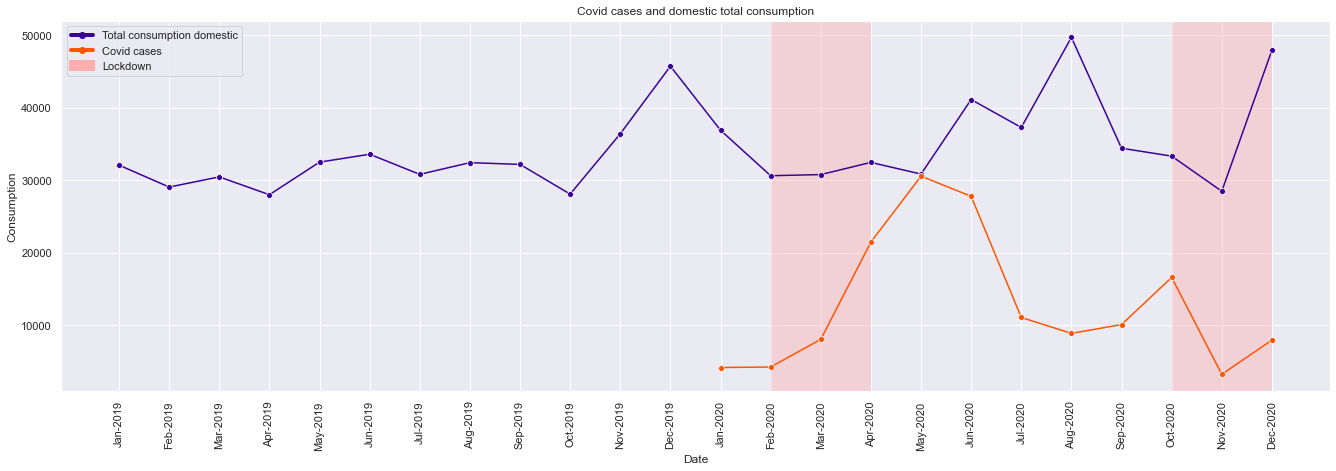

In [170]:
fig=plt.figure(figsize=(50,15))
ax1=fig.add_subplot(221)
ax1.tick_params(axis='x', rotation=90)
firstPlot = sns.lineplot(x=df_2019.Date, y=df_2019.Consumption, ax=ax1, marker = 'o', color='#390099').set_title("Covid cases and domestic total consumption")
sns.lineplot(x=covid.Date, y=covid.Cases, ax=ax1,  label="Covid cases", marker = 'o', color='#ff5400')
plt.axvspan( pd.to_datetime("2020/02", format='%Y/%m').strftime('%b-%Y'),  pd.to_datetime("2020/4", format='%Y/%m').strftime('%b-%Y'), fill=True, linewidth=0, color='#ffadad', alpha=.4)
plt.axvspan( pd.to_datetime("2020/10", format='%Y/%m').strftime('%b-%Y'),  pd.to_datetime("2020/12", format='%Y/%m').strftime('%b-%Y'), fill=True, linewidth=0, color='#ffadad', alpha=.4)

legend_elements = [Line2D([0], [0], color='#390099', lw=4, label='Total consumption domestic', marker='o'),
Line2D([0], [0], color='#ff5400', lw=4, label='Covid cases', marker='o'), 
plt.Circle((0, 0), 0.2, color='#ffadad', lw=4, label='Lockdown')]
ax1.legend(handles=legend_elements)

plt.savefig('charts/base_analysis/covid_consumption_domestic_2019.png')
plt.show(block=True)

In [ ]:
consumer = df.drop(columns=["Consumer_number", "Installation_zone", "Installation_number", 'Month',  'Year'])
consumer.head(5)